In [1]:
import json
import requests
import pandas as pd
import numpy as np
import random
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

city_list=[
"Boston",
"Miami",
"Seattle",
"New York City",
"Dallas",
"Denver",
"Los Angeles", 
"San Francisco",
"Detroit",
"Honolulu",
]


In [2]:
city_data=pd.read_csv("EconomicTracker/data/GeoIDs - City.csv")
covid_daily_cases=pd.read_csv("EconomicTracker/data/COVID Cases - City - Daily.csv")
daily_mobility=pd.read_csv("EconomicTracker/data/Google Mobility - City - Daily.csv")

In [3]:
city_data=city_data.loc[city_data['cityname'].isin(city_list)]
city_data

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019
0,1,Los Angeles,CA,California,6,10039107
1,2,New York City,NY,New York,36,8336817
6,7,Dallas,TX,Texas,48,2635516
8,9,Seattle,WA,Washington,53,2252782
12,13,Detroit,MI,Michigan,26,1749343
20,21,San Francisco,CA,California,6,881549
24,25,Boston,MA,Massachusetts,25,803907
27,28,Denver,CO,Colorado,8,727211
37,38,Miami,FL,Florida,12,2716940
47,48,Honolulu,HI,Hawaii,15,974563


In [4]:
merge1=pd.merge(city_data,covid_daily_cases,on="cityid",how="left")
merge1.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate
0,1,Los Angeles,CA,California,6,10039107,2020,1,21,0,0,0.0,.
1,1,Los Angeles,CA,California,6,10039107,2020,1,22,0,0,0.0,.
2,1,Los Angeles,CA,California,6,10039107,2020,1,23,0,0,0.0,.
3,1,Los Angeles,CA,California,6,10039107,2020,1,24,0,0,0.0,.
4,1,Los Angeles,CA,California,6,10039107,2020,1,25,0,0,0.0,.


In [5]:
data_df=pd.merge(merge1,daily_mobility,on=["cityid","month","day","year"],how="inner")

In [6]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,0,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,0,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,0,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,0,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,0,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,89,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,114,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,88,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,158,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000


In [7]:
data_df["concat"] = data_df["month"].astype(str) + data_df["day"].astype(str)

In [8]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,...,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625,224
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,...,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020,225
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,...,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620,226
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,...,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620,227
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,...,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,...,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000,97
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,...,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000,98
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,...,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000,99
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,...,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000,910


In [9]:
data_df["concat"] = data_df["concat"].astype(int)

completed_city_data=data_df.loc[(data_df['month'] >= 3)]

completed_city_data=completed_city_data.sort_values(by=['month', 'day'],ascending=False)

completed_city_data=completed_city_data[:-140]

In [10]:
completed_city_data.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,...,2511.0,8.05,-0.2910,-0.1170,-.0557,-0.431,-0.373,0.1200,-0.1420,911
401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,...,2902.0,3.08,-0.2200,-0.0590,.812,-0.379,-0.413,0.1020,-0.1110,911
602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,...,2971.0,12,-0.1570,-0.0886,.234,-0.336,-0.356,0.0843,-0.0959,911
803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,...,920.0,3.97,-0.2500,-0.1060,.711,-0.503,-0.469,0.1360,-0.1490,911
1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,...,1894.0,10.5,-0.0771,-0.0614,.,-0.350,-0.346,0.0614,-0.0638,911


In [11]:
completed_city_data['new_case_rate']=completed_city_data['new_case_rate'].astype(float)
completed_city_data['gps_away_from_home'] = pd.to_numeric(completed_city_data['gps_away_from_home'],errors='coerce')
completed_city_data.to_csv("CSV Files/completed_covid_cases_data.csv")

In [12]:
la_df = completed_city_data.loc[(completed_city_data['cityname'] =='Los Angeles')]
nyc_df=completed_city_data.loc[(completed_city_data['cityname'] =='New York City')]
dallas_df=completed_city_data.loc[(completed_city_data['cityname'] =='Dallas')]
seattle_df=completed_city_data.loc[(completed_city_data['cityname'] =='Seattle')]
detroit_df=completed_city_data.loc[(completed_city_data['cityname'] =='Detroit')]
sf_df=completed_city_data.loc[(completed_city_data['cityname'] =='San Francisco')]
boston_df=completed_city_data.loc[(completed_city_data['cityname'] =='Boston')]
denver_df=completed_city_data.loc[(completed_city_data['cityname'] =='Denver')]
miami_df=completed_city_data.loc[(completed_city_data['cityname'] =='Miami')]
honolulu_df=completed_city_data.loc[(completed_city_data['cityname'] =='Honolulu')]
march_df=completed_city_data.loc[(completed_city_data['month'] =='3')]
april_df=completed_city_data.loc[(completed_city_data['month'] =='4')]
may_df=completed_city_data.loc[(completed_city_data['month'] =='5')]
june_df=completed_city_data.loc[(completed_city_data['month'] =='6')]
july_df=completed_city_data.loc[(completed_city_data['month'] =='7')]
august_df=completed_city_data.loc[(completed_city_data['month'] =='8')]
september_df=completed_city_data.loc[(completed_city_data['month'] =='9')]







completed_city_data.dtypes

C:\Users\willi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


cityid                         int64
cityname                      object
stateabbrev                   object
statename                     object
statefips                      int64
city_pop2019                   int64
year                           int64
month                          int64
day                            int64
case_count                     int64
new_case_count                 int64
case_rate                    float64
new_case_rate                float64
gps_retail_and_recreation    float64
gps_grocery_and_pharmacy     float64
gps_parks                     object
gps_transit_stations         float64
gps_workplaces               float64
gps_residential              float64
gps_away_from_home           float64
concat                         int32
dtype: object

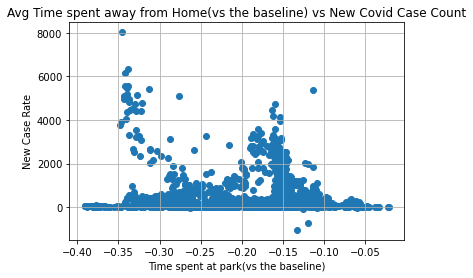

In [13]:

plt.scatter(completed_city_data['gps_away_from_home'],completed_city_data['new_case_count'])
plt.title("Avg Time spent away from Home(vs the baseline) vs New Covid Case Count")
plt.ylabel("New Case Rate")
plt.xlabel("Time spent at park(vs the baseline)")
plt.grid(True)


The corrleation coefficient is -0.61 meaning there is a moderate negative correlation.
The Linear Regress model for this is y=-1311.54x + 6.51


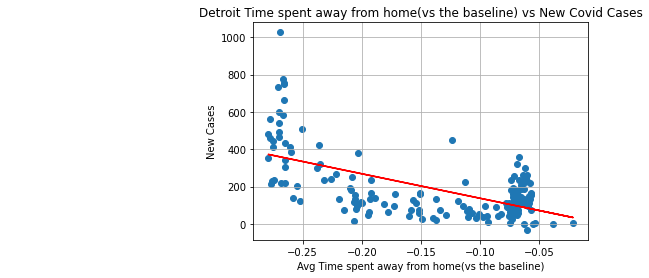

In [221]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit_df['gps_away_from_home'],detroit_df['new_case_count'])

regress_values = slope*detroit_df['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit_df['gps_away_from_home'],detroit_df['new_case_count'])
plt.title("Detroit Time spent away from home(vs the baseline) vs New Covid Cases")
plt.ylabel("New Cases")
plt.grid(True)
plt.xlabel("Avg Time spent away from home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit_df['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a moderate negative correlation.')
print(f'The Linear Regress model for this is {line_eq}')


In [15]:
weather_averages=pd.read_csv("CSV Files/marchseptember.csv")
city_average=completed_city_data.groupby(["cityname","month"]).agg({'gps_away_from_home':'mean'})
city_average=city_average.reset_index()

In [20]:
city_average=city_average.rename(columns={"cityname": "Name", "month": "Period"})
temp_outside_df=pd.merge(weather_averages,city_average, on=["Name","Period"])
temp_outside_df.rename(columns={"gps_parks": "Time Spend not at home vs Baseline"})

,Name,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,gps_away_from_home
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38,-0.161682
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76,-0.236500
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31,-0.167161
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04,-0.123500
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85,-0.130387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73,-0.229871
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05,-0.164167
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30,-0.174065
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98,-0.161613


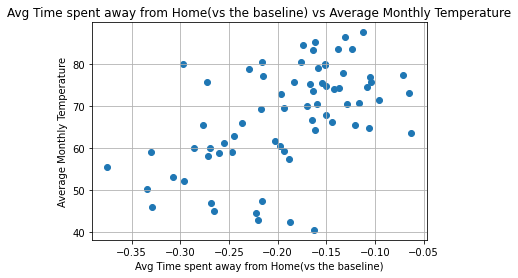

In [21]:
plt.scatter(temp_outside_df['gps_away_from_home'],temp_outside_df['Temperature'])
plt.title("Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Average Monthly Temperature")
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.grid(True)


The corrleation coefficient is 0.81 meaning there is a strong positive correlation.
The Linear Regress model for this is y=148.02x + 80.48


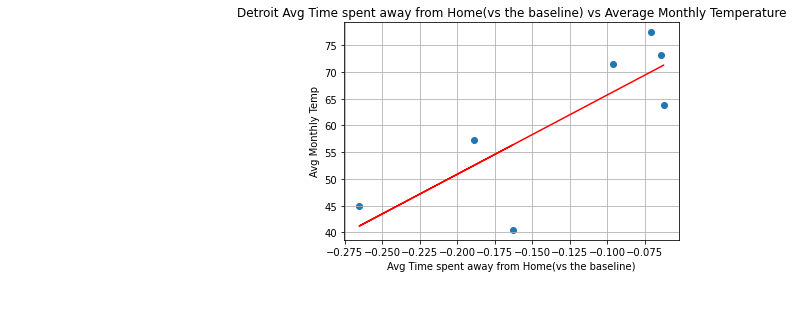

In [22]:

detroit=temp_outside_df.loc[(temp_outside_df['Name'] =='Detroit')]


(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit['gps_away_from_home'],detroit['Temperature'])

regress_values = slope*detroit['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit['gps_away_from_home'],detroit['Temperature'])
plt.title("Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Avg Monthly Temp")
plt.grid(True)
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a strong positive correlation.')
print(f'The Linear Regress model for this is {line_eq}')
